In [1]:
import tensorflow as tf
from tensorflow import keras
 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

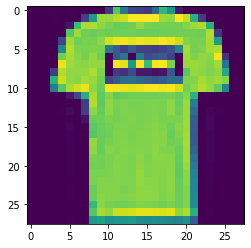

In [8]:
plt.imshow(train_images[1])

In [9]:
train_labels[1]

0

In [10]:
class_names[train_labels[1]]

'T-shirt/top'

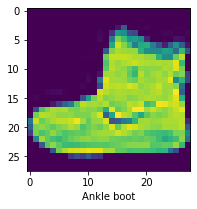

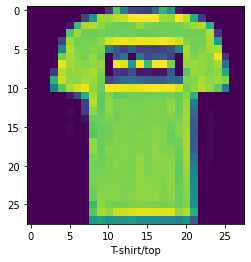

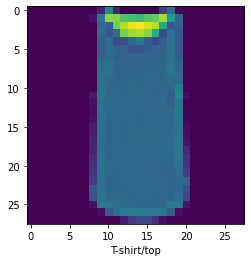

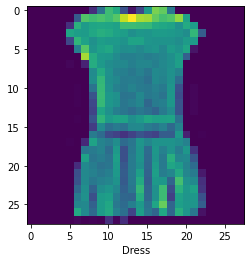

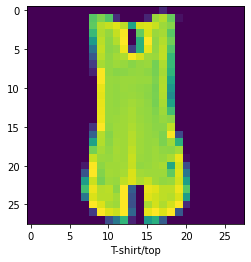

In [12]:
plt.figure(figsize = (3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [13]:
train_images_scaled = train_images/255.0
test_images_scaled = test_images/255.0

In [14]:
def get_model(hidden_layers = 1):
    ## Flatten layer of input
    layers = [keras.layers.Flatten(input_shape = (28, 28))]
    ## hidden layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation = 'relu'),)
        # output layer
    layers.append(keras.layers.Dense(10, activation = 'sigmoid'))
    
    model = keras.Sequential(layers)
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    
    return model
        

In [15]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5829 - accuracy: 0.7959
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3700 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3251 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.8912
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2816 - accuracy: 0.8949


In [16]:
model.predict(test_images_scaled)[2]

array([6.6198707e-03, 9.9999976e-01, 8.3528183e-05, 3.9862305e-02,
       1.2573004e-03, 4.2984438e-09, 3.1492114e-04, 7.5743529e-13,
       1.3304193e-05, 3.2720615e-09], dtype=float32)

In [17]:
test_labels[2]

1

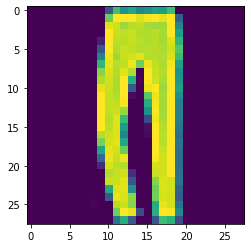

In [18]:
plt.imshow(test_images[2])

In [19]:
class_names[test_labels[2]]

'Trouser'

In [21]:
class_names[np.argmax(model.predict(test_images_scaled)[2])]

'Trouser'

### 5 Epocs performance comparison for 1 hidden layer

In [22]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5944 - accuracy: 0.7897
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3656 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3255 - accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.8960
25.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5849 - accuracy: 0.7932
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3256 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2992 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8955
25.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### 5 Epocs performance comparison with 5 hidden layers

In [24]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6301 - accuracy: 0.7708
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4019 - accuracy: 0.8543
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3570 - accuracy: 0.8722
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3355 - accuracy: 0.8785
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3080 - accuracy: 0.8875
1min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6495 - accuracy: 0.7659
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4015 - accuracy: 0.8544
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3517 - accuracy: 0.8705
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3265 - accuracy: 0.8808
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3063 - accuracy: 0.8896
1min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
